In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from geoplot import utils
import geoplot as gplt
from geoplot import crs as ccrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

`plt.savefig` is not working, for the moment I am just saving plot output manually. Obviously that will have to change.

# Pointplot

## Demo 1

In [130]:
mkdir ./figures/pointplot

mkdir: ./figures/pointplot: File exists


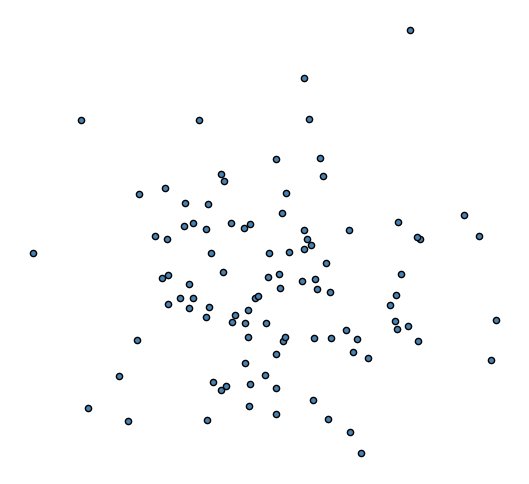

In [6]:
points = utils.gaussian_points()
gplt.pointplot(points, projection=ccrs.PlateCarree())
# fig = plt.gcf()
# fig.savefig('./figures/pointplot/pointplot_demo_1.png')

## Demo 2

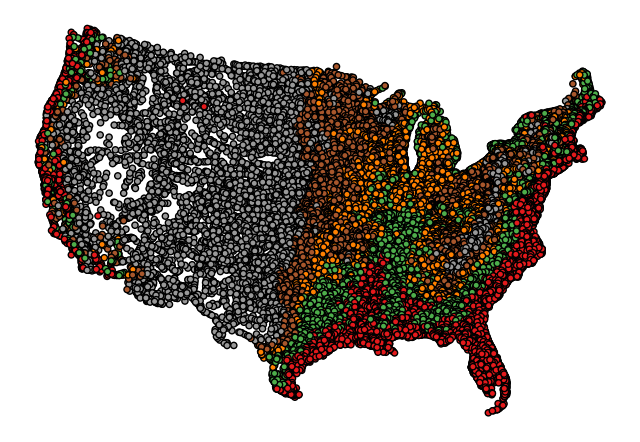

In [58]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]
gplt.pointplot(cities, projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT')

In [88]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(5000), geometry=collisions.head(5000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

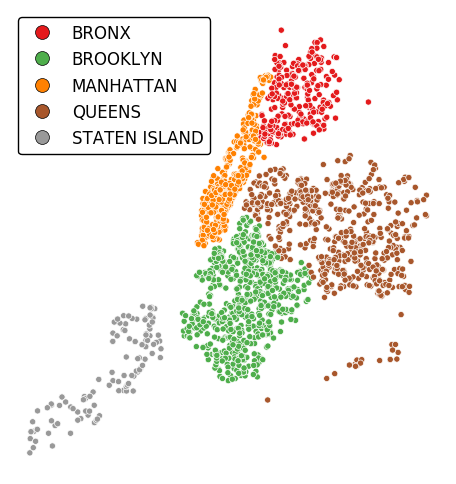

In [92]:
gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=ccrs.AlbersEqualArea(), 
               hue='BOROUGH', categorical=True, 
               legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'})

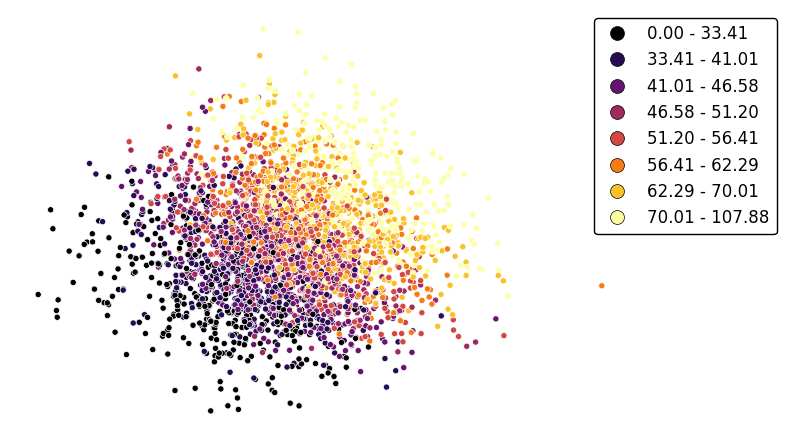

In [141]:
more_points = utils.gaussian_points(n=3000)
data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
data = data.assign(var=data['classification'] * 0.5 + pd.Series([p.x + p.y for p in data['geometry']]) + 50 + np.random.normal(size=3000) * 8)
gplt.pointplot(data, projection=ccrs.AlbersEqualArea(),
               hue='var', cmap='inferno', k=8,
               edgecolor='white', linewidth=0.5,
               legend=True, legend_kwargs={'bbox_to_anchor': (1.25, 1.0)})
plt.savefig('./figures/pointplot/pointplot_demo_4.png')

In [125]:
# Unused.
# more_points = utils.gaussian_points(n=3000)
# data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
# gplt.pointplot(data, projection=ccrs.AlbersEqualArea(),
#                hue='classification', categorical=True, 
#                edgecolor='white', linewidth=0.5)